In [1]:
# For decision tree model
library(rpart)
# For data visualization
library(rpart.plot)
# Contains the data
library(ISLR)
# Get the list of data sets contained in package
d <- data(package = "ISLR")
d$results[, "Item"]

Warning message:
"package 'rpart' was built under R version 4.4.1"
Warning message:
"package 'rpart.plot' was built under R version 4.4.1"
Warning message:
"package 'ISLR' was built under R version 4.4.1"


[1] "Auto"      "Caravan"   "Carseats"  "College"   "Credit"    "Default"  
 [7] "Hitters"   "Khan"      "NCI60"     "OJ"        "Portfolio" "Smarket"  
[13] "Wage"      "Weekly"

In [2]:
data(Carseats)
# Get the variable names
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

In [3]:
dim(Carseats)

[1] 400  11

In [4]:
# Creates a new binary variable, High.
High = ifelse(Carseats$Sales <=8, "No", "Yes")
# Add High to the data set.
Carseats=data.frame(Carseats,High)
# Remove the Sales variable from the data.
Carseats.H <- Carseats[,-1]
# Code High as a factor variable
Carseats.H$High = as.factor(Carseats$High)
class(Carseats.H$High)

[1] "factor"

In [5]:
set.seed(234)
train = sample(1:nrow(Carseats.H), 200)
Carseats.train=Carseats.H[train,]
Carseats.test=Carseats.H[-train,]
High.test=High[-train]
fit.tree = rpart(High ~ ., data=Carseats.train, method = "class", cp=0.008)
fit.tree

n= 200 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 200 90 No (0.55000000 0.45000000)  
   2) ShelveLoc=Bad,Medium 154 52 No (0.66233766 0.33766234)  
     4) Price>=92.5 132 35 No (0.73484848 0.26515152)  
       8) Advertising< 13.5 106 19 No (0.82075472 0.17924528) *
       9) Advertising>=13.5 26 10 Yes (0.38461538 0.61538462)  
        18) Age>=44 15  6 No (0.60000000 0.40000000) *
        19) Age< 44 11  1 Yes (0.09090909 0.90909091) *
     5) Price< 92.5 22  5 Yes (0.22727273 0.77272727) *
   3) ShelveLoc=Good 46  8 Yes (0.17391304 0.82608696)  
     6) Price>=135 7  2 No (0.71428571 0.28571429) *
     7) Price< 135 39  3 Yes (0.07692308 0.92307692) *

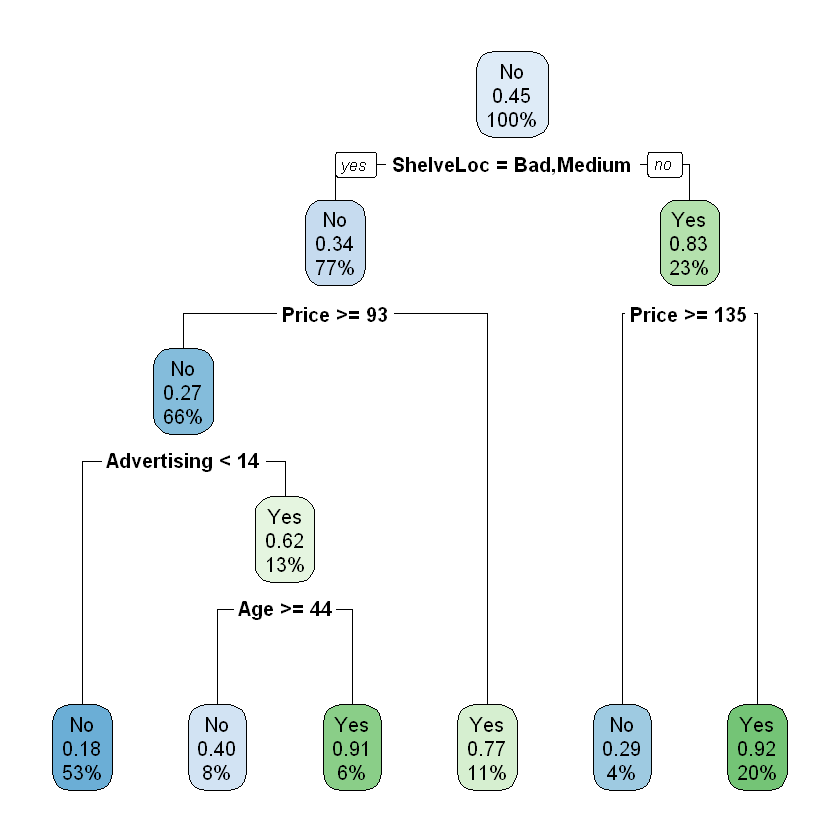

In [6]:
# Visualizing the unpruned tree
rpart.plot(fit.tree)

In [7]:
# Checking the order of variable importance
fit.tree$variable.importance

ShelveLoc       Price Advertising         Age   CompPrice      Income 
 16.8994918  14.5382371   8.5411152   3.2895105   1.7804529   1.4952320 
  Education  Population 
  0.5980928   0.2990464

In [8]:
pred.tree = predict(fit.tree, Carseats.test, type = "class")
table(pred.tree,High.test)

         High.test
pred.tree  No Yes
      No  110  32
      Yes  16  42

In [9]:
#plotcp(fit.tree)
printcp(fit.tree)


Classification tree:
rpart(formula = High ~ ., data = Carseats.train, method = "class", 
    cp = 0.008)

Variables actually used in tree construction:
[1] Advertising Age         Price       ShelveLoc  

Root node error: 90/200 = 0.45

n= 200 

        CP nsplit rel error  xerror     xstd
1 0.333333      0   1.00000 1.00000 0.078174
2 0.133333      1   0.66667 0.66667 0.072008
3 0.066667      2   0.53333 0.60000 0.069761
4 0.033333      3   0.46667 0.54444 0.067582
5 0.008000      5   0.40000 0.66667 0.072008


In [10]:
# Explicitly request the lowest cp value
fit.tree$cptable[which.min(fit.tree$cptable[,"xerror"]),"CP"]

[1] 0.03333333

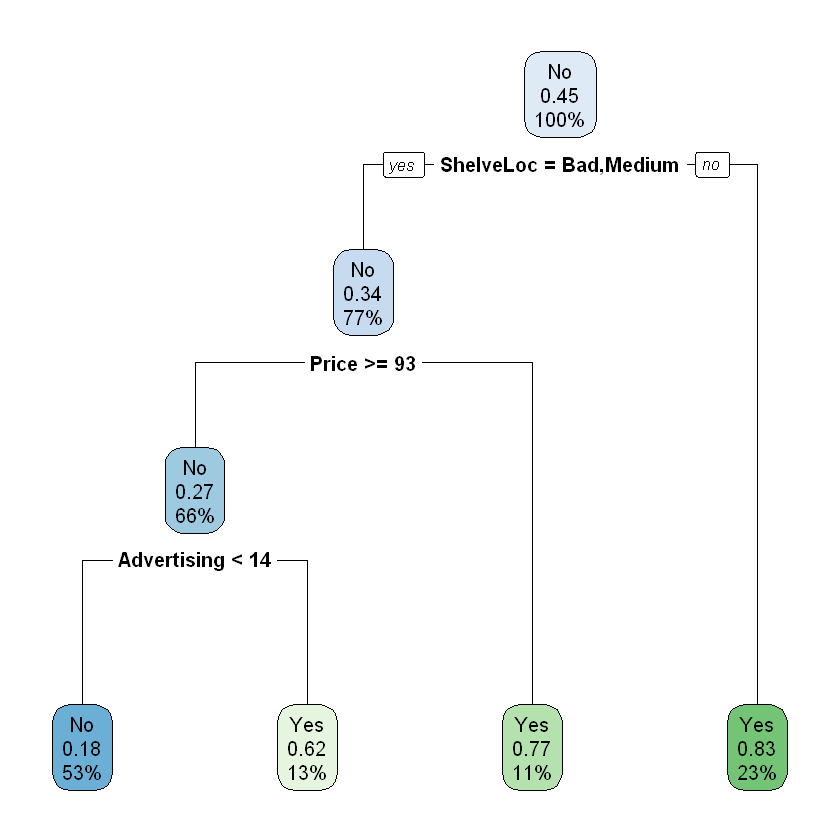

In [11]:
bestcp <-fit.tree$cptable[which.min(fit.tree$cptable[,"xerror"]),"CP"]
pruned.tree <- prune(fit.tree, cp = bestcp)
rpart.plot(pruned.tree)

In [12]:
# Alternate specification
pred.prune = predict(pruned.tree, Carseats.test, type="class")
table(pred.prune, High.test)

          High.test
pred.prune No Yes
       No  96  22
       Yes 30  52

In [13]:
# Remove the variable High variable from the data.
Carseats.S <- Carseats[,-12]
set.seed(234)
train = sample(1:nrow(Carseats.S), 200)
Carseats.train=Carseats.S[train,]
Carseats.test=Carseats.S[-train,]
# Build the regression tree on the training set
fit.tree = rpart(Sales ~ ., data=Carseats.train, method="anova", cp=0.008)
#summary(fit.tree)
fit.tree

n= 200 

node), split, n, deviance, yval
      * denotes terminal node

  1) root 200 1596.13500  7.720450  
    2) ShelveLoc=Bad,Medium 154  908.83350  6.902727  
      4) Price>=92.5 132  665.46350  6.458030  
        8) ShelveLoc=Bad 41  186.98880  4.909024  
         16) CompPrice< 137.5 31   93.80490  4.369677  
           32) Price>=102.5 24   46.87750  3.850417  
             64) Income>=78 10   15.49221  2.933000 *
             65) Income< 78 14   16.95694  4.505714 *
           33) Price< 102.5 7   18.26940  6.150000 *
         17) CompPrice>=137.5 10   56.21109  6.581000 *
        9) ShelveLoc=Medium 91  335.77520  7.155934  
         18) Advertising< 13.5 70  217.43040  6.699429  
           36) CompPrice< 141.5 55  129.23440  6.286727  
             72) Price>=124.5 20   26.05848  5.414000  
              144) Income< 85 12    7.11050  4.735000 *
              145) Income>=85 8    5.11675  6.432500 *
             73) Price< 124.5 35   79.23827  6.785429  
              146)

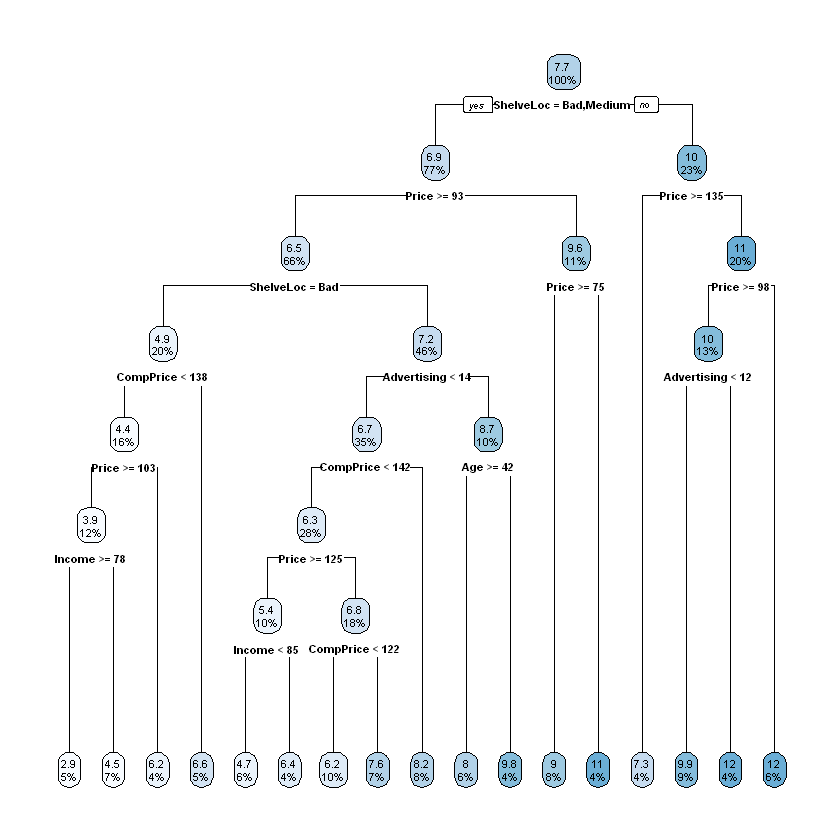

In [14]:
rpart.plot(fit.tree)

In [15]:
fit.tree$variable.importance

ShelveLoc       Price   CompPrice Advertising      Income         Age 
 590.418012  389.383611  153.349660  100.448780   55.043771   31.917276 
 Population   Education          US       Urban 
  26.786291   19.240978    8.182210    2.135904

In [16]:
#Predict Using the Regression Tree and Evaluate
#Performance
pred.tree = predict(fit.tree, Carseats.test)

# Calcualte the mean square error
mse <- mean((pred.tree - Carseats.test$Sales)^2)
mse

[1] 4.537886

In [17]:
# Finding the best CP value
printcp(fit.tree)


Regression tree:
rpart(formula = Sales ~ ., data = Carseats.train, method = "anova", 
    cp = 0.008)

Variables actually used in tree construction:
[1] Advertising Age         CompPrice   Income      Price       ShelveLoc  

Root node error: 1596.1/200 = 7.9807

n= 200 

          CP nsplit rel error  xerror     xstd
1  0.2805017      0   1.00000 1.01274 0.086707
2  0.1144803      1   0.71950 0.73668 0.064211
3  0.0894032      2   0.60502 0.70898 0.068519
4  0.0529042      3   0.51561 0.63450 0.060518
5  0.0396043      4   0.46271 0.62745 0.062296
6  0.0273887      5   0.42311 0.65640 0.069145
7  0.0231639      6   0.39572 0.63721 0.067014
8  0.0179546      7   0.37255 0.62940 0.066112
9  0.0172186      8   0.35460 0.63026 0.067400
10 0.0149973      9   0.33738 0.62986 0.067925
11 0.0111370     10   0.32238 0.65073 0.068184
12 0.0107054     11   0.31125 0.64495 0.067733
13 0.0103597     12   0.30054 0.64443 0.067775
14 0.0101472     13   0.29018 0.64781 0.067436
15 0.0090396     14  

In [21]:
bestcp <- fit.tree$cptable[which.min(fit.tree$cptable[,"xerror"]),"CP"]
bestcp

[1] 0.03960432

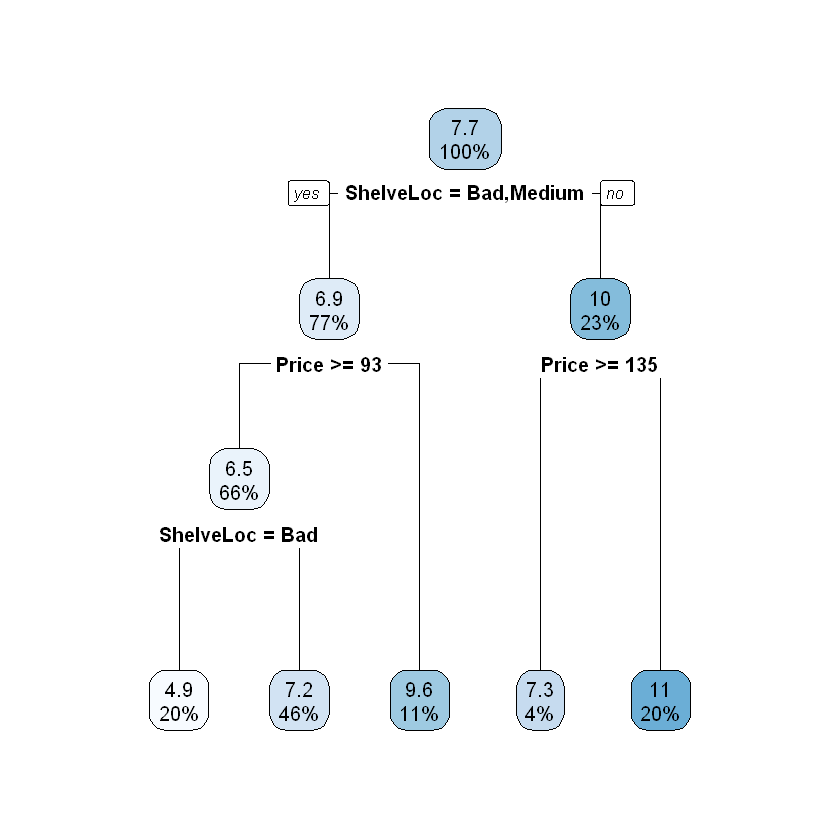

In [22]:
# Prune the tree with the best cp value (the lowest cross-validation error - xerror)
pruned.tree <- prune(fit.tree, cp = bestcp)

# Visualizing the pruned tree
rpart.plot(pruned.tree)

In [23]:
# Checking the order of variable importance
pruned.tree$variable.importance

ShelveLoc      Price  CompPrice Population 
590.418012 267.168273  16.611453   3.480476

In [24]:
# Use the test data to evaluate performance of pruned regression tree
pred.prune = predict(pruned.tree, Carseats.test)
# Calcualte the MSE for the pruned tree
mse <- mean((pred.prune - Carseats.test$Sales)^2)
mse

[1] 5.180412